In [24]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
plot_types=['PhiMean','PhiStDev','PhiKurtosis','PhiSkewness','PhiTsallisPower','ThetaMean','ThetaStDev','ThetaKurtosis','ThetaSkewness','ThetaTsallisPower','SZDetProb']
y_axis_titles=['Mean Phi (radians)', 'Phi Standard Deviation (radians)','Phi Kurtosis (0=Gaussian)', 'Phi Skewness (0=Centered)','Phi Tsallis Power (>30 ~ Gauss)',
    'Mean Theta (radians)', 'Theta Standard Deviation (radians)','Theta Kurtosis (0=Gaussian)', 'Theta Skewness (0=Centered)','Theta Tsallis Power (>30 ~ Gauss)', r"$T_2$ Time (s)"]
legend_titles = ["Parallel","AntiParallel"]
colors=['blue','red']
linestyles=['-','--']

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist2 (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist3 (Potential memory leak).


[(443, 454, 465, 476, 487, 498)]


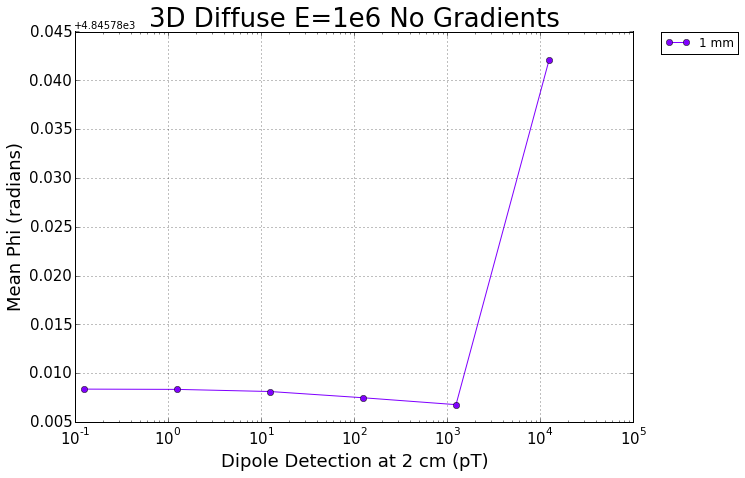

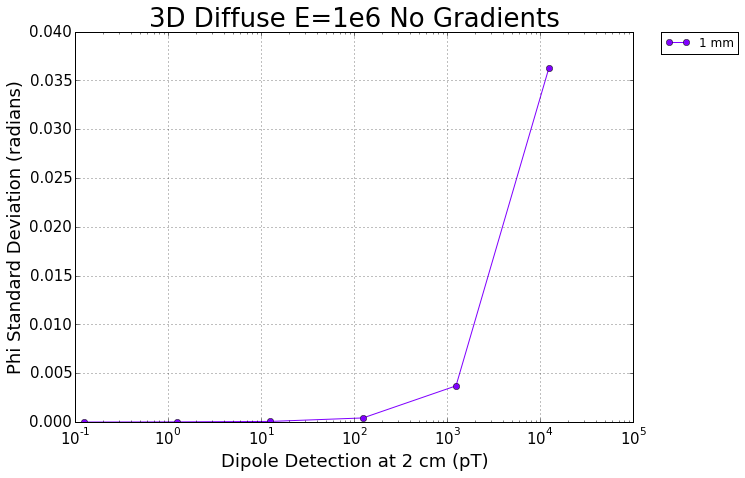

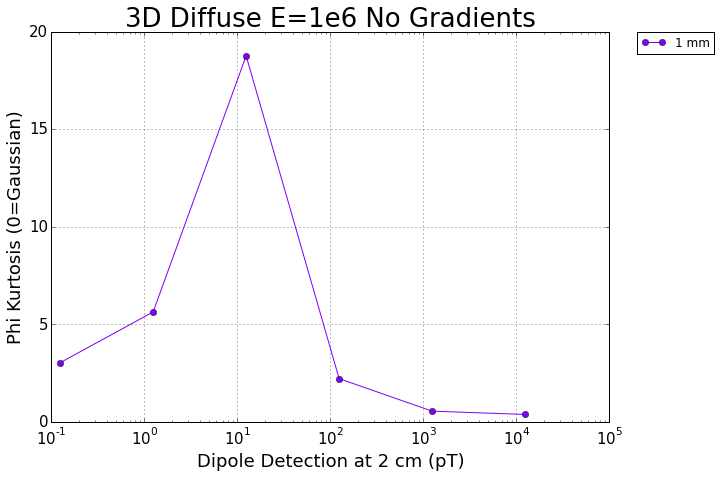

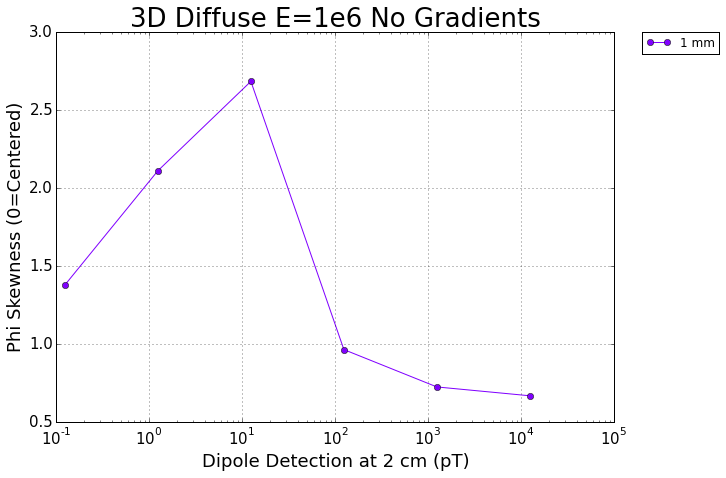

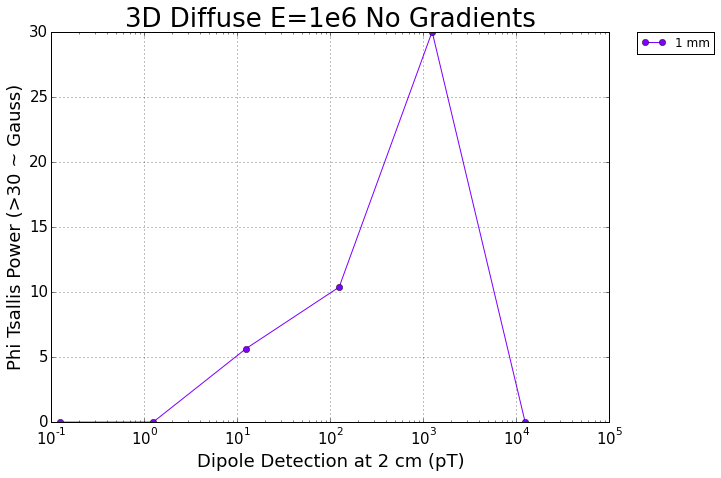

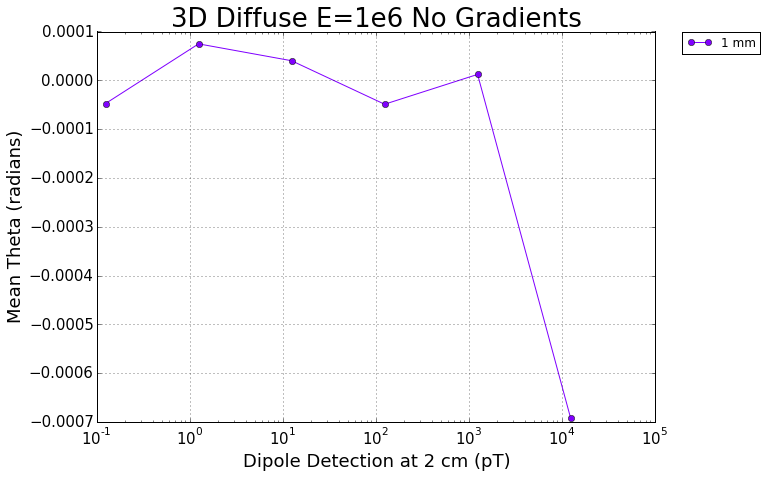

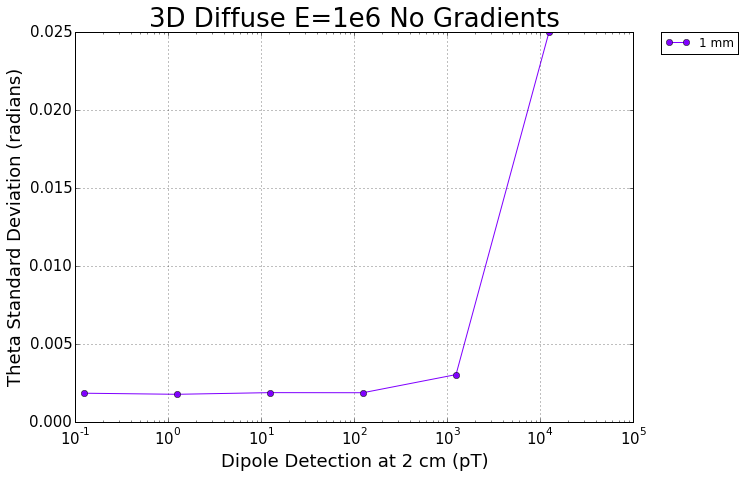

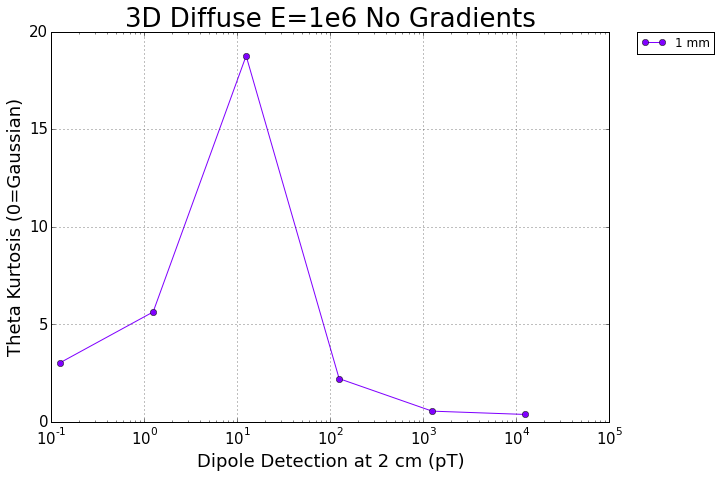

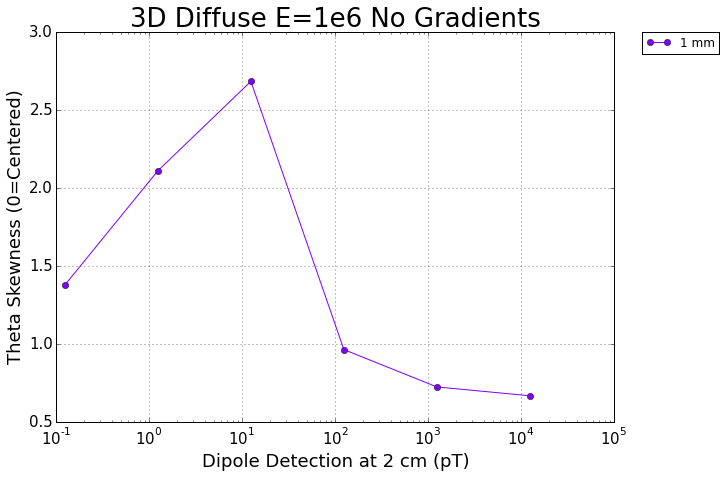

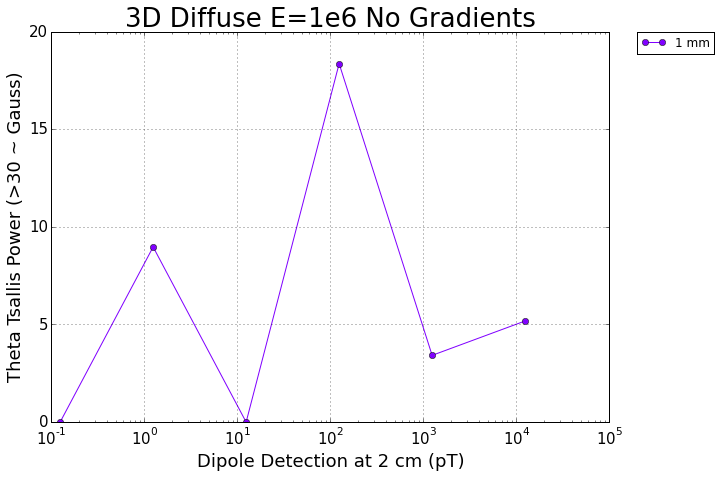

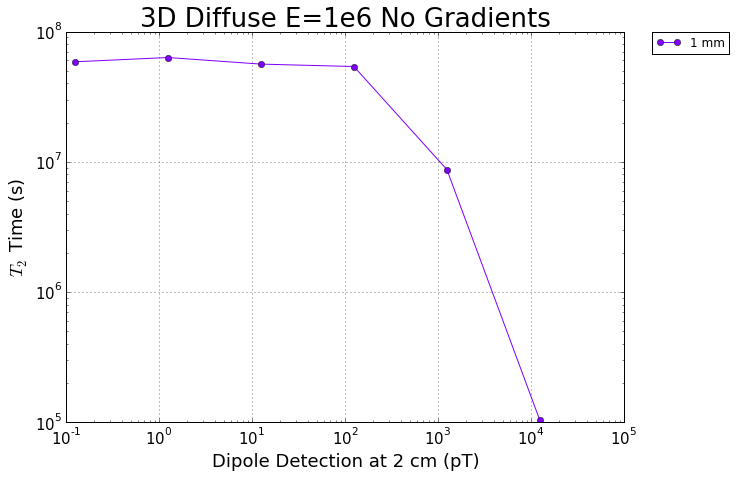

In [25]:
variable = 'DipoleFieldStrength'
main_title = '3D Diffuse E=1e6 No Gradients'
x_axis_title = 'Dipole Detection at 2 cm (pT)'
lambda_func=[lambda x:(x/pow(0.02,3))*1.e12,lambda x:x,lambda x:x,lambda x:x]
rid_list = range(443, 509)
dist_range = np.concatenate([[.001], np.arange(.01, .11, .01)])
lines_dipstr = [rid_list[x:x+len(dist_range)] for x in xrange(0, len(rid_list), len(dist_range))]
lines = zip(*lines_dipstr)
lines=[lines[0]]
print lines

for i in range(len(plot_types)):
    plot_type=plot_types[i]

    y_axis_title=y_axis_titles[i]
    data=[]
    for config_type in ['Par']:
        full_plot_type=config_type + "_" +plot_type
        titles=[main_title,x_axis_title,y_axis_title]
        data += srkdata.get_plot_data_from_database_mult(lines, [variable,full_plot_type])
    if(plot_type == 'SZDetProb'):
        lambda_func=[lambda x:(x/pow(0.02,3))*1.e12,lambda x:-100/math.log(1-2*x),lambda x:x,lambda x:x]
        plt.yscale('log', noncvposy='clip')
    srkgraphics.make_plot_from_data(data, titles=titles, legend_titles=["1 mm"],lambda_func=lambda_func)
#     plt.yscale('log', noncvposy='clip')
    plt.xscale('log', noncvposy='clip')
    plt.show()
                        
